In [288]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

In [289]:
df=pd.read_csv('Bank_marketing.csv')

In [290]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [291]:
df.shape

(210, 7)

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [14]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [18]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


In [20]:
import warnings
warnings. filterwarnings('ignore')

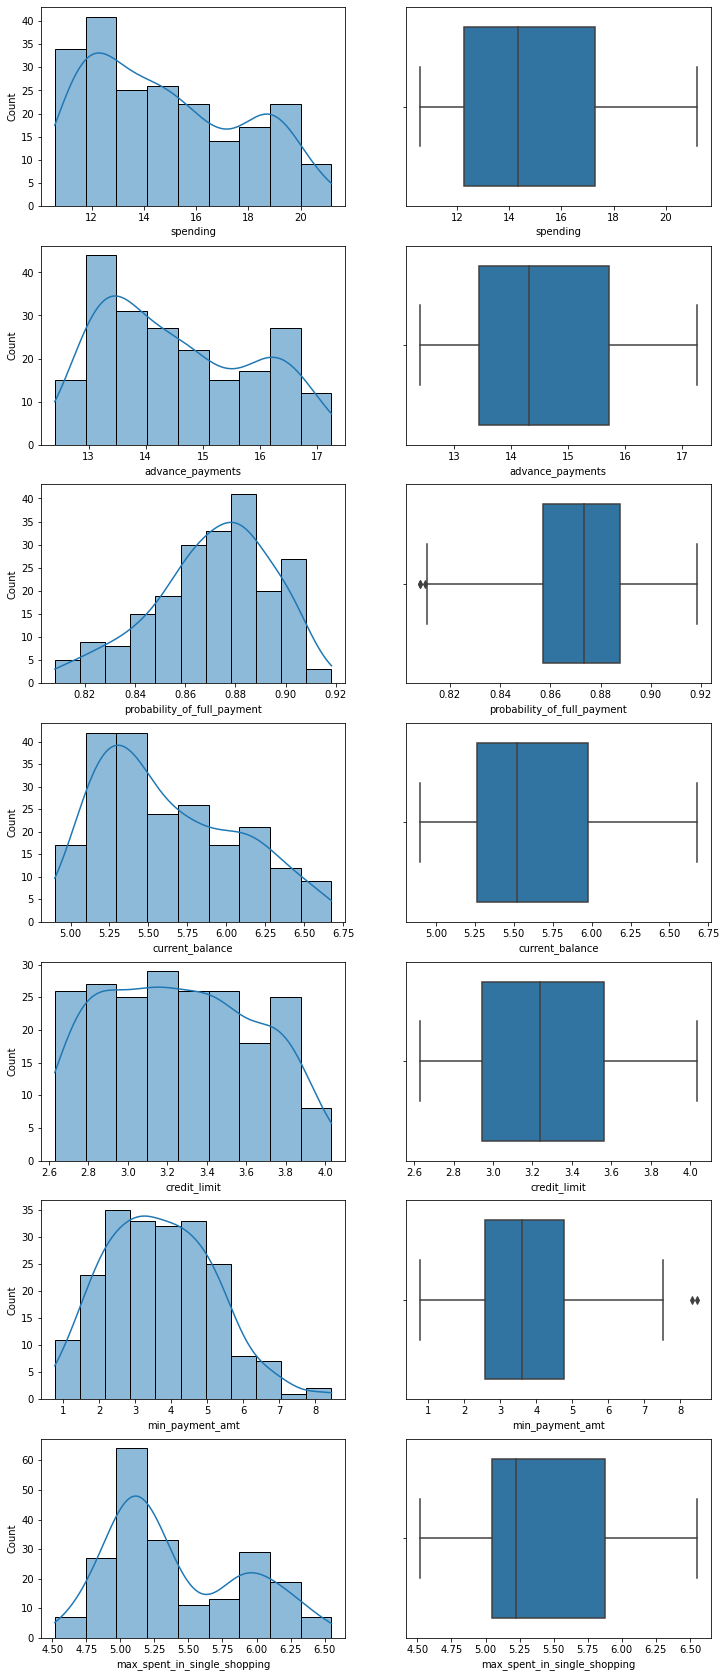

In [298]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(12,30)
sns.histplot(df['spending'], kde=True, ax=axes[0][0])
sns.boxplot(x='spending', data=df, ax=axes[0][1])
sns.histplot(df['advance_payments'] , kde=True, ax=axes[1][0])
sns.boxplot(x='advance_payments', data=df , ax=axes[1][1])
sns.histplot(df['probability_of_full_payment'], kde=True, ax=axes[2][0])
sns.boxplot(x='probability_of_full_payment',data=df, ax=axes[2][1])
sns.histplot(df['current_balance'] , kde=True, ax=axes[3][0])
sns.boxplot(x='current_balance', data=df , ax=axes[3][1])
sns.histplot(df['credit_limit'], kde=True, ax=axes[4][0])
sns.boxplot(x='credit_limit', data=df, ax=axes[4][1])
sns.histplot(df['min_payment_amt'] , kde=True, ax=axes[5][0])
sns.boxplot(x='min_payment_amt', data=df , ax=axes[5][1])
sns.histplot(df['max_spent_in_single_shopping'], kde=True, ax=axes[6][0])
sns.boxplot(x='max_spent_in_single_shopping', data=df, ax=axes[6][1])
plt.show()

In [489]:
df.skew(axis = 0, skipna = True)

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.522793
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.360001
max_spent_in_single_shopping    0.561897
dtype: float64

In [491]:
df.var(axis = 0, skipna = True)

spending                        8.466351
advance_payments                1.705528
probability_of_full_payment     0.000555
current_balance                 0.196305
credit_limit                    0.142668
min_payment_amt                 2.234095
max_spent_in_single_shopping    0.241553
dtype: float64

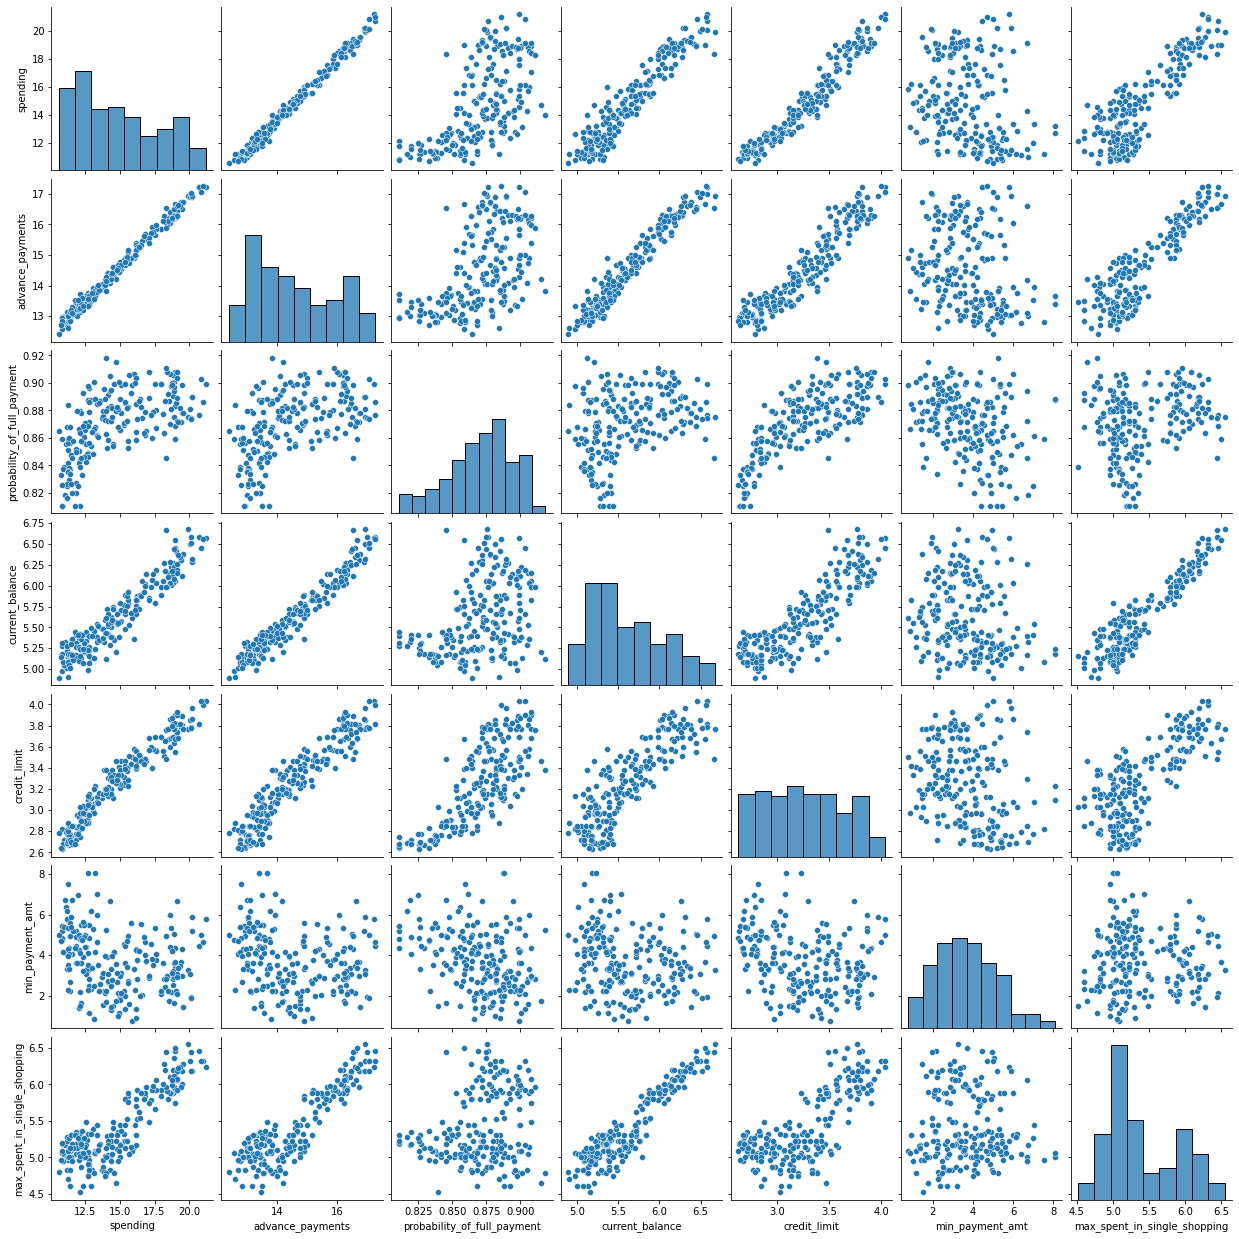

In [476]:
sns.pairplot(df)
plt.show()

In [27]:
corr = df.corr(method='pearson')

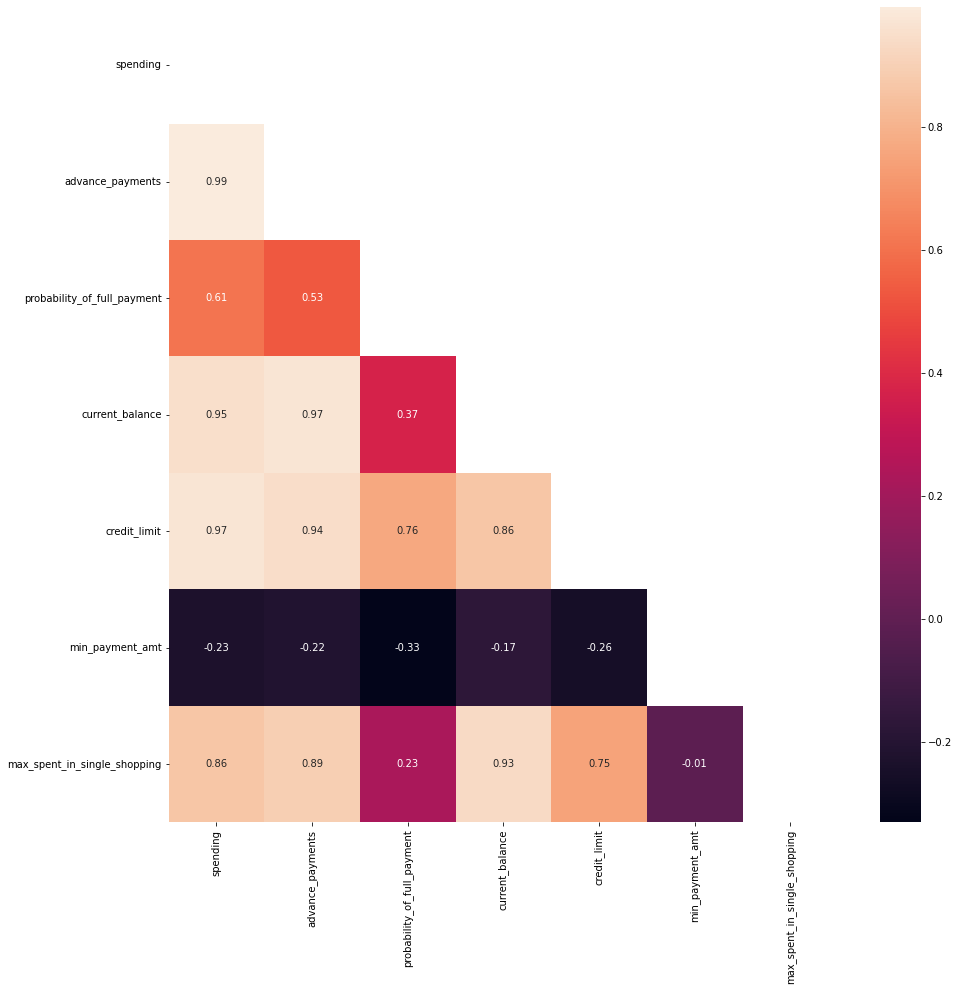

In [29]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f",mask=mask);

In [498]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [499]:
#Cap & floor the values beyond the outlier boundaries
feature_list = df.columns
for i in feature_list:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

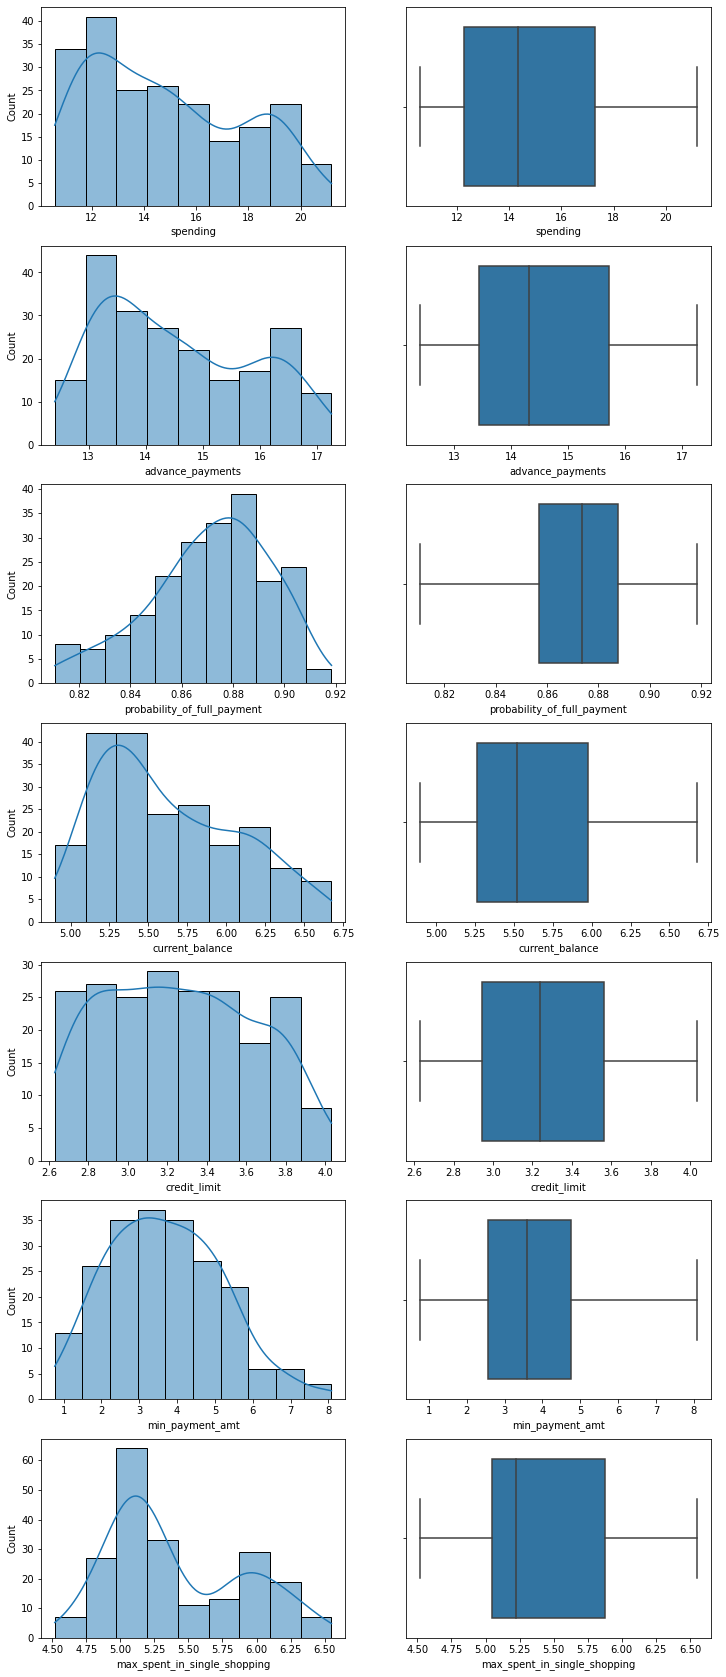

In [500]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(12,30)
sns.histplot(df['spending'], kde=True, ax=axes[0][0])
sns.boxplot(x='spending', data=df, ax=axes[0][1])
sns.histplot(df['advance_payments'] , kde=True, ax=axes[1][0])
sns.boxplot(x='advance_payments', data=df , ax=axes[1][1])
sns.histplot(df['probability_of_full_payment'], kde=True, ax=axes[2][0])
sns.boxplot(x='probability_of_full_payment',data=df, ax=axes[2][1])
sns.histplot(df['current_balance'] , kde=True, ax=axes[3][0])
sns.boxplot(x='current_balance', data=df , ax=axes[3][1])
sns.histplot(df['credit_limit'], kde=True, ax=axes[4][0])
sns.boxplot(x='credit_limit', data=df, ax=axes[4][1])
sns.histplot(df['min_payment_amt'] , kde=True, ax=axes[5][0])
sns.boxplot(x='min_payment_amt', data=df , ax=axes[5][1])
sns.histplot(df['max_spent_in_single_shopping'], kde=True, ax=axes[6][0])
sns.boxplot(x='max_spent_in_single_shopping', data=df, ax=axes[6][1])
plt.show()

In [501]:
from sklearn.preprocessing import StandardScaler

In [502]:
X = StandardScaler()

In [503]:
scaled_df = X.fit_transform(df)
scaled_df

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

In [ ]:
pca_final_df = pd.DataFrame(pca_final, columns = df1_selected.columns)

In [487]:
scaleddf1=pd.DataFrame(scaled_df, columns=df.columns)

In [492]:
scaleddf1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


In [493]:
scaleddf1.var()

spending                        1.004785
advance_payments                1.004785
probability_of_full_payment     1.004785
current_balance                 1.004785
credit_limit                    1.004785
min_payment_amt                 1.004785
max_spent_in_single_shopping    1.004785
dtype: float64

In [504]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [505]:
wardlink = linkage(scaled_df, method = 'ward')

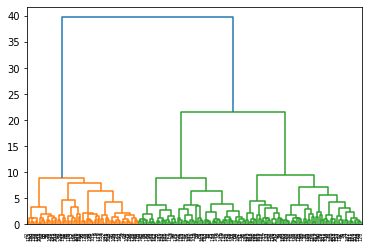

In [506]:
dend = dendrogram(wardlink)

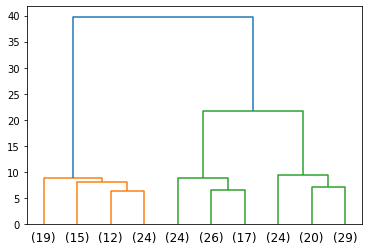

In [59]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [309]:
avglink = linkage(scaled_df, method = 'average')

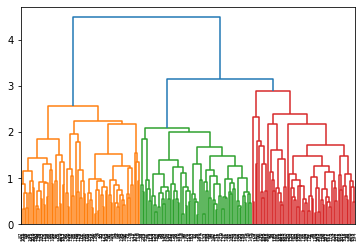

In [310]:
dend2 = dendrogram(avglink)

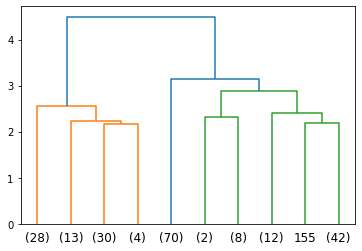

In [311]:
dend2 = dendrogram(avglink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [315]:
completelink = linkage(scaled_df, method = 'complete',metric='euclidean')

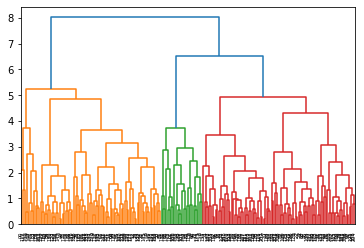

In [316]:
dend3 = dendrogram(completelink)

In [318]:
from scipy.cluster.hierarchy import fcluster

In [520]:
#Method 1

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [521]:
# Method 2

clusters1 = fcluster(wardlink, 15, criterion='distance')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [517]:
df['clusters'] = clusters

In [518]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [523]:
df.to_csv('hc.csv')

In [ ]:
K-Means-Clustering

In [524]:
wss =[] 
for i in range(1,15):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [525]:
wss

[1469.999999999999,
 659.14740095485,
 430.298481751223,
 370.6909292210199,
 327.457935726944,
 290.4705314674424,
 262.7827442976696,
 240.53367531755998,
 225.30383291643133,
 204.53723891188793,
 192.74655080783162,
 182.9676278790312,
 173.23982544662445,
 164.65881755580438]

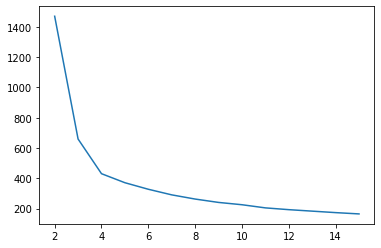

In [526]:
plt.plot(range(2,16), wss)

In [553]:
k_means = KMeans(n_clusters = 3 )
k_means.fit(scaled_df)
labels = k_means.labels_

In [539]:
df["Clus_kmeans"] = labels
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0


In [554]:
k_means.inertia_

430.298481751223

In [555]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [556]:
silhouette_score(scaled_df,labels)

0.4008059221522216

In [557]:
silhouette_samples(scaled_df,labels).min()

0.0027685411286160638

In [542]:
silhouette_score(scaled_df,labels)

0.4008059221522216

In [543]:
sil_width = silhouette_samples(scaled_df,labels)

In [545]:
df["sil_width"] = sil_width
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0,0.573278
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2,2,0.365564
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0,0.637092
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,1,0.515595
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0,0.360972


In [547]:
df.to_csv('hc_kmeans.csv')

# Problem-2 CART,RANDOM Forest,ANN

In [626]:
ins=pd.read_csv('insurance+part2.csv')

In [627]:
ins.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


In [392]:
ins.shape

(3000, 10)

In [393]:
ins.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [394]:
ins.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [628]:
ins.duplicated().sum()

139

In [629]:
ins['Agency_Code'].unique()

array(['C2B', 'EPX', 'CWT', 'JZI'], dtype=object)

In [630]:
ins.drop_duplicates(inplace=True)

In [631]:
ins.duplicated().sum()

0

In [632]:
ins.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   object 
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   object 
 9   Destination   2861 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 245.9+ KB


In [399]:
ins.describe()

,Age,Commision,Duration,Sales
count,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,15.080996,72.120238,61.757878
std,10.678106,25.826834,135.977200,71.399740
min,8.000000,0.000000,-1.000000,0.000000
25%,31.000000,0.000000,12.000000,20.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,66.000000,69.300000
max,84.000000,210.210000,4580.000000,539.000000


In [634]:
ins[ins['Duration'] < 0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


In [635]:
ins[ins['Duration'] > 500]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2845,48,C2B,Airlines,No,0.09,Online,4580,0.32,Customised Plan,ASIA


In [636]:
ins['Duration'] = ins['Duration'].replace(4580,ins['Duration'].median())

In [637]:
ins['Duration'] = ins['Duration'].replace(-1,ins['Duration'].median())

In [638]:
ins[ins['Duration'] < 0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [639]:
ins[ins['Duration'] > 500]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [640]:
ins.describe()

,Age,Commision,Duration,Sales
count,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,15.080996,70.539322,61.757878
std,10.678106,25.826834,106.684360,71.399740
min,8.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,12.000000,20.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,65.000000,69.300000
max,84.000000,210.210000,466.000000,539.000000


In [641]:
ins.Claimed.value_counts()

No     1947
Yes     914
Name: Claimed, dtype: int64

In [371]:
print(ins.Claimed.value_counts())
print('%1s = ',914/(1947+914)*100)
print('%0s = ',1947/(1947+914)*100)

No     1947
Yes     914
Name: Claimed, dtype: int64
%1s =  31.946871723173714
%0s =  68.05312827682629


In [46]:
ins.Agency_Code.value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

In [48]:
ins.Type.value_counts()

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

In [49]:
ins.Channel.value_counts()

Online     2954
Offline      46
Name: Channel, dtype: int64

In [67]:
ins.Destination.value_counts()

ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64

Univariate Analysis

<AxesSubplot:xlabel='Age'>

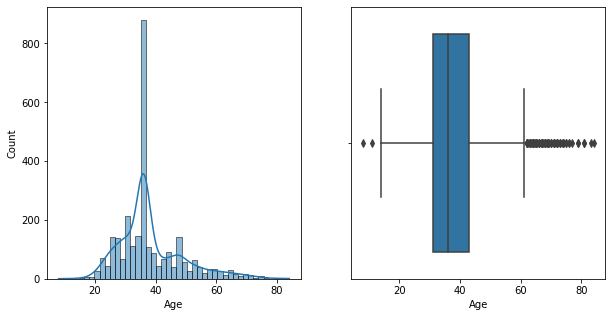

In [408]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(ins.Age, kde=True, ax=axs[0])
sns.boxplot(x='Age',data=ins, ax=axs[1])

<AxesSubplot:xlabel='Commision'>

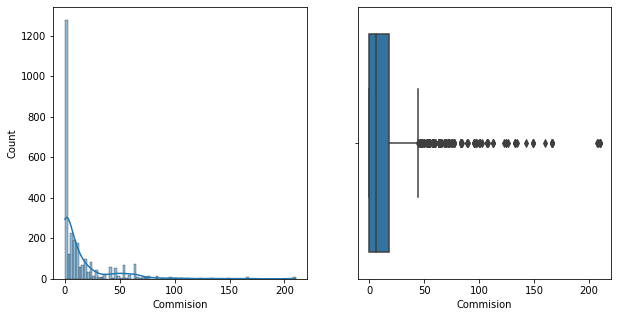

In [409]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(ins.Commision, kde=True, ax=axs[0])
sns.boxplot(x='Commision',data=ins, ax=axs[1])

<AxesSubplot:xlabel='Duration'>

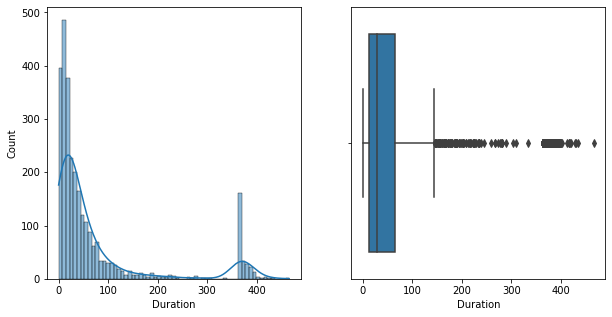

In [410]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(ins.Duration, kde=True, ax=axs[0])
sns.boxplot(x='Duration',data=ins, ax=axs[1])

<AxesSubplot:xlabel='Sales'>

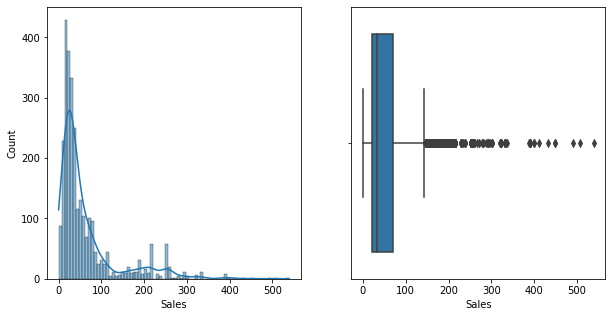

In [411]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(ins.Sales, kde=True, ax=axs[0])
sns.boxplot(x='Sales',data=ins, ax=axs[1])

<AxesSubplot:xlabel='Destination', ylabel='count'>

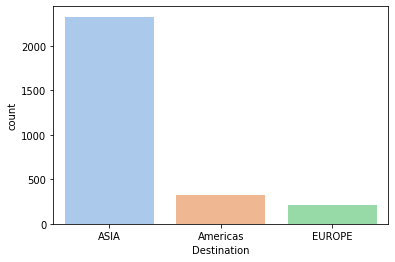

In [85]:
sns.countplot(x='Destination', data=ins, palette='pastel')

<AxesSubplot:xlabel='Channel', ylabel='count'>

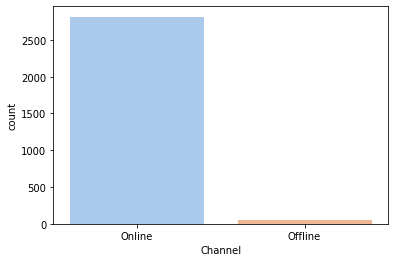

In [86]:
sns.countplot(x='Channel', data=ins, palette='pastel')

<AxesSubplot:xlabel='Claimed', ylabel='Age'>

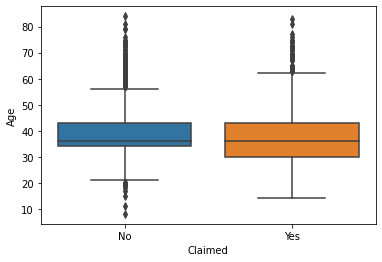

In [412]:
sns.boxplot(x='Claimed', y = 'Age', data=ins)

<AxesSubplot:xlabel='Channel', ylabel='Age'>

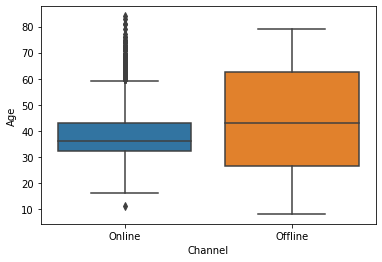

In [413]:
sns.boxplot(x='Channel', y = 'Age', data=ins)

<AxesSubplot:xlabel='Type', ylabel='Age'>

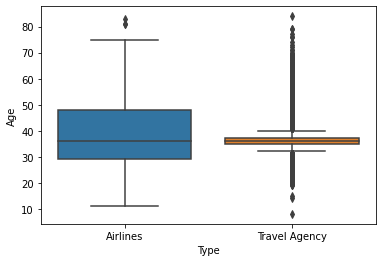

In [414]:
sns.boxplot(x='Type', y = 'Age', data=ins)

C:\Users\91702\anaconda3\envs\Python_JP\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


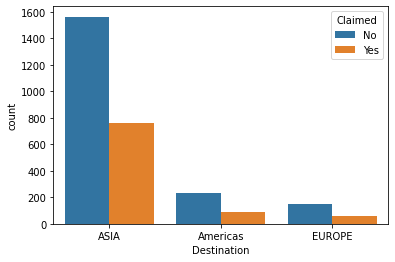

In [18]:
sns.countplot(ins['Destination'],hue=ins['Claimed']);

Bivariate analysis

In [ ]:
## Numeric vs Numeric

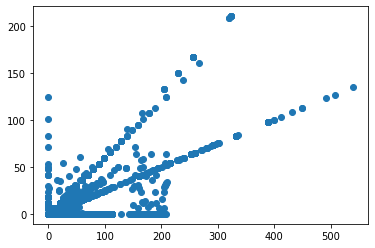

In [415]:
plt.scatter(ins['Sales'],ins['Commision'])

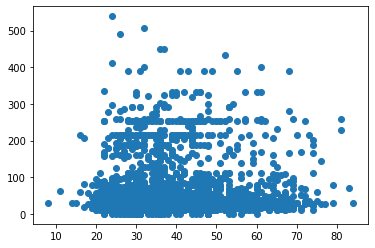

In [69]:
plt.scatter(ins['Age'],ins['Sales'])

In [22]:
## Categorical vs Categorical

<AxesSubplot:xlabel='Destination', ylabel='count'>

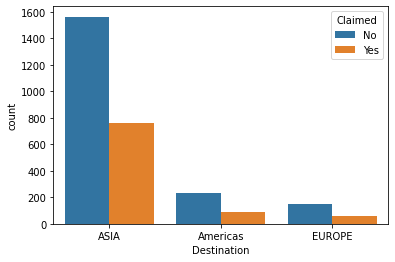

In [24]:
sns.countplot(x='Destination', hue='Claimed', data=ins)

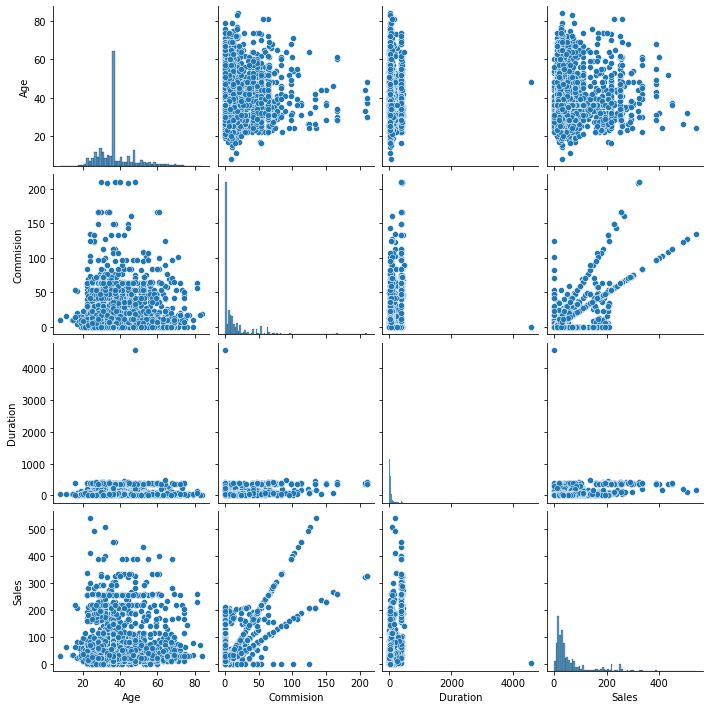

In [560]:
sns.pairplot(ins)
plt.show()

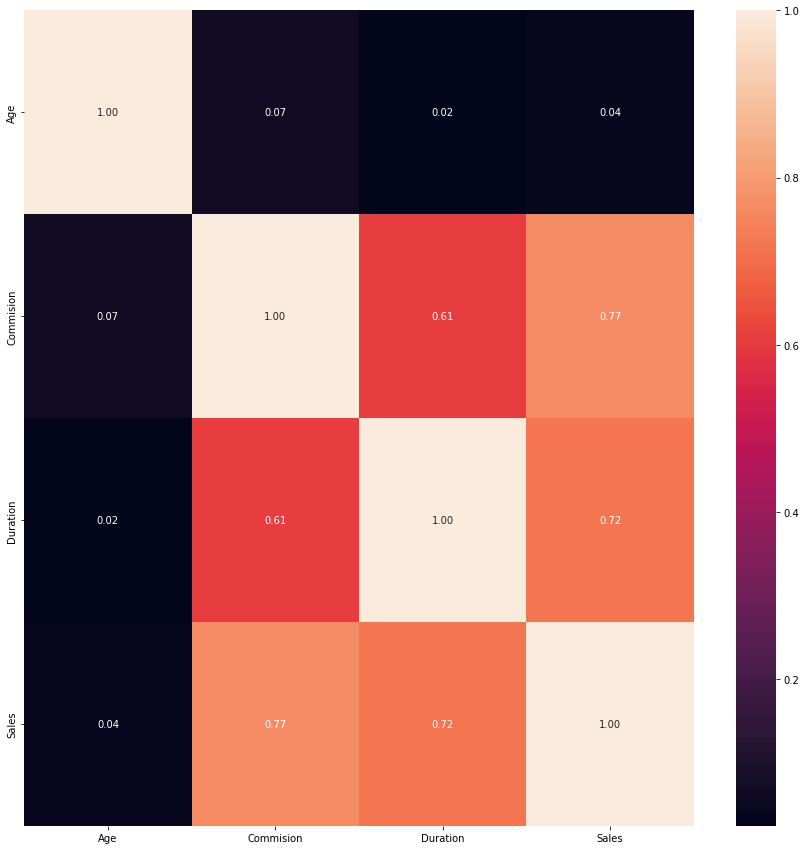

In [54]:
plt.figure(figsize=(15,15))
sns.heatmap(ins.corr(),annot=True,fmt=".2f");

In [28]:
## Multivariate Analysis

<AxesSubplot:xlabel='Claimed', ylabel='Age'>

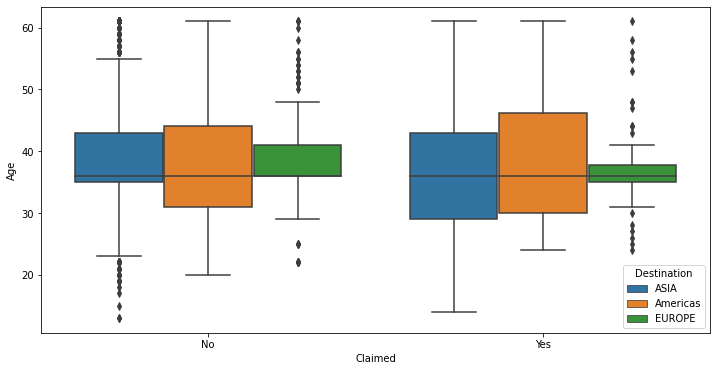

In [385]:
fig_dims = (12, 6)
fig = plt.subplots(figsize=fig_dims)
sns.boxplot(x='Claimed', y='Age', hue='Destination',data=ins)

In [642]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [643]:
#Cap & floor the values beyond the outlier boundaries
feature_list = ['Age','Commision','Duration','Sales']
for i in feature_list:
    LL, UL = remove_outlier(ins[i])
    ins[i] = np.where(ins[i] > UL, UL, ins[i])
    ins[i] = np.where(ins[i] < LL, LL, ins[i])

<AxesSubplot:xlabel='Commision'>

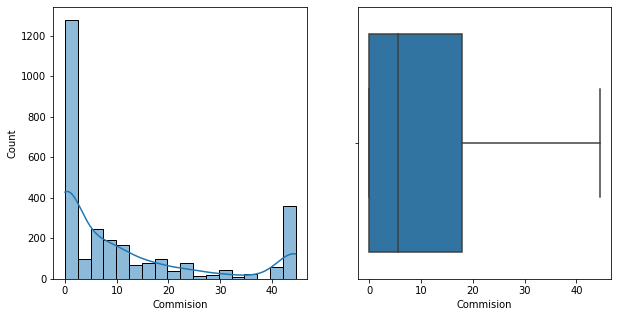

In [644]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(ins.Commision, kde=True, ax=axs[0])
sns.boxplot(x='Commision',data=ins, ax=axs[1])

<AxesSubplot:xlabel='Sales'>

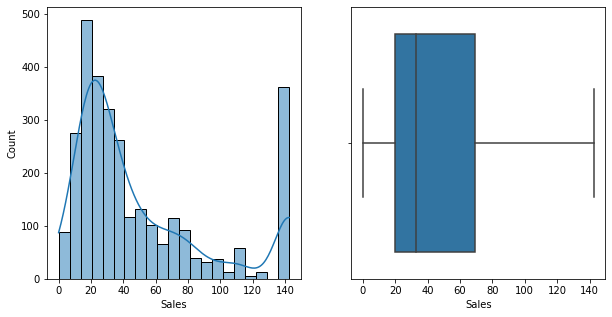

In [567]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(ins.Sales, kde=True, ax=axs[0])
sns.boxplot(x='Sales',data=ins, ax=axs[1])

In [645]:

for feature in ins.columns: 
    if ins[feature].dtype == 'object': 
        ins[feature] = pd.Categorical(ins[feature]).codes

In [646]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   float64
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 128.5 KB


In [647]:
ins.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0
5,45.0,3,0,1,15.75,1,8.0,45.00,0,0
6,61.0,1,1,0,35.64,1,30.0,59.40,2,1
7,36.0,2,1,0,0.00,1,16.0,80.00,1,0
8,36.0,2,1,0,0.00,1,19.0,14.00,1,0
9,36.0,2,1,0,0.00,1,42.0,43.00,1,0


In [648]:
# capture the target column ("default") into separate vectors for training set and test set

X = ins.drop("Claimed" , axis=1)

y = ins.pop("Claimed")

In [649]:
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0.00,1,34.0,20.00,2,0
2,39.0,1,1,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0.00,1,4.0,26.00,1,0
4,33.0,3,0,6.30,1,53.0,18.00,0,0


In [650]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claimed, dtype: int8

In [651]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0,stratify=y)

Descision Tree Classifier

In [178]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [258]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [180]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [259]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.187853
Agency_Code   0.175029
Type          0.002285
Commision     0.083537
Channel       0.004510
Duration      0.269864
Sales         0.214140
Product Name  0.044495
Destination   0.018287


In [652]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8, 9, 10],
    'min_samples_leaf': [25, 50, 100],
    'min_samples_split': [75, 150, 250]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 10)

In [653]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [25, 50, 100],
                         'min_samples_split': [75, 150, 250]})

In [262]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 15, 'min_samples_split': 75}

In [438]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=15,min_samples_split=75)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=15, min_samples_split=75)

In [439]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.027308
Agency_Code   0.543514
Type          0.000000
Commision     0.031079
Channel       0.007369
Duration      0.098368
Sales         0.179630
Product Name  0.111302
Destination   0.001429


In [190]:
from sklearn import tree

train_char_label = ['No', 'Yes']
prune_Tree_File = open('prune_Tree_File.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, 
                                out_file=prune_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

prune_Tree_File.close()

In [588]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [589]:
from sklearn.metrics import classification_report,confusion_matrix

In [590]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1453
           1       0.67      0.59      0.63       647

    accuracy                           0.78      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.78      0.78      0.78      2100



In [591]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       623
           1       0.70      0.53      0.61       277

    accuracy                           0.79       900
   macro avg       0.76      0.72      0.73       900
weighted avg       0.78      0.79      0.78       900



In [592]:
confusion_matrix(train_labels, ytrain_predict)

array([[1265,  188],
       [ 266,  381]], dtype=int64)

In [593]:
confusion_matrix(test_labels, ytest_predict)

array([[559,  64],
       [129, 148]], dtype=int64)

In [594]:
reg_dt_model.score(X_train,train_labels)

0.7838095238095238

In [595]:
reg_dt_model.score(X_test,test_labels)

0.7855555555555556

In [596]:
import matplotlib.pyplot as plt

AUC: 0.836


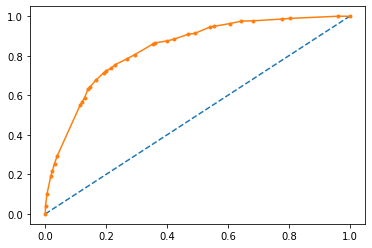

In [597]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.812


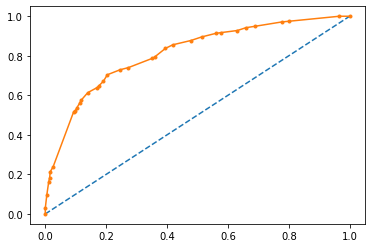

In [598]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Random Forest Classifier

In [599]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [9,10],
    'max_features': [ 4, 8],
    'min_samples_leaf': [15,25],
    'min_samples_split': [60,75],
    'n_estimators': [301,501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [601]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9, 10], 'max_features': [4, 8],
                         'min_samples_leaf': [15, 25],
                         'min_samples_split': [60, 75],
                         'n_estimators': [301, 501]})

In [602]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 15,
 'min_samples_split': 60,
 'n_estimators': 501}

In [453]:
best_grid = grid_search.best_estimator_

In [603]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [604]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.86      0.24      0.38      1453
           1       0.35      0.91      0.51       647

    accuracy                           0.45      2100
   macro avg       0.61      0.58      0.44      2100
weighted avg       0.71      0.45      0.42      2100



In [605]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.25      0.39       623
           1       0.35      0.93      0.51       277

    accuracy                           0.46       900
   macro avg       0.62      0.59      0.45       900
weighted avg       0.72      0.46      0.43       900



In [606]:
confusion_matrix(train_labels, ytrain_predict)

array([[ 352, 1101],
       [  55,  592]], dtype=int64)

In [607]:
confusion_matrix(test_labels, ytest_predict)

array([[156, 467],
       [ 20, 257]], dtype=int64)

In [608]:
best_grid.score(X_train,train_labels)

0.44952380952380955

In [609]:
best_grid.score(X_test,test_labels)

0.4588888888888889

AUC: 0.733


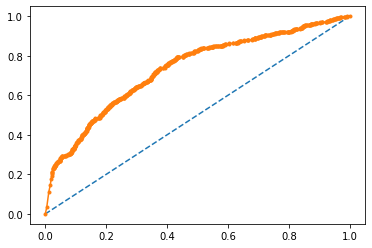

In [610]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.723


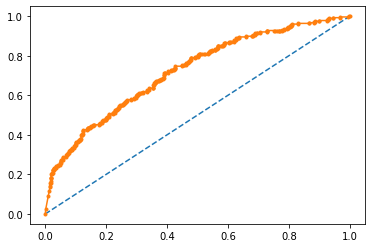

In [611]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# MLP Classifier (Artificial Neural Network)

In [612]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [613]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [614]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [10000], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01]})

In [615]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [616]:
best_grid = grid_search.best_estimator_

In [617]:
ytrain_predict = best_grid.predict(X_trains)
ytest_predict = best_grid.predict(X_tests)

In [618]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1453
           1       0.74      0.48      0.58       647

    accuracy                           0.79      2100
   macro avg       0.77      0.70      0.72      2100
weighted avg       0.78      0.79      0.77      2100



In [619]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       623
           1       0.73      0.40      0.52       277

    accuracy                           0.77       900
   macro avg       0.76      0.67      0.69       900
weighted avg       0.76      0.77      0.75       900



AUC: 0.399


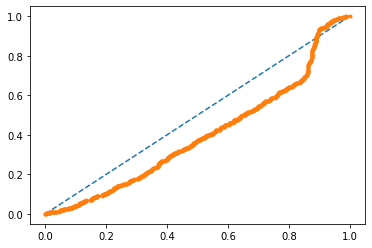

In [621]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.449


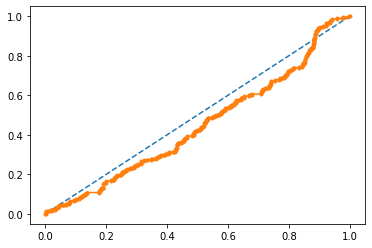

In [623]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
####2.4 Final Model: Compare all the models and write an inference which model is best/optimized.
Comparing all the models in terms of confusion matrix, classification report and looking at the ROC curve 
It is clear that Random Forest model is best in terms of assessing the claimed or unclaimed classification.


In [ ]:
##Inference: Based on the whole Analysis, what are the business insights and recommendations
AUC on the training data is 83% and on test data is 82%. The precision and recall metrics are also almost similar 
between training and test set, which indicates no overfitting or underfitting has happened.
Random model has better improved performance over the initial clf model as the sensitivity was much lesser in the 
initial model.
The Overall model performance is moderate enough to start predicting if any new customer will claim or not